<a href="https://colab.research.google.com/github/AaronRM9416/Core-Classwork/blob/main/breast_cancer_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
df= pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTyELmsLV-pgpO38gtx5z-e-XTSg4tXzPWHLk5jrVTla4nCF09y7qdIvgEspcySGPKVWuyoy7iTHBES/pub?output=csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

Text(0.5, 0, 'concave points_worst')

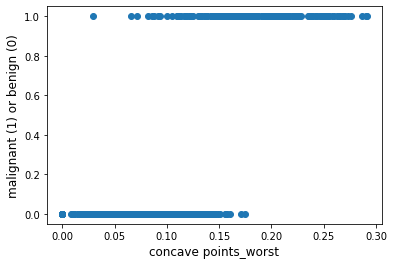

In [4]:
plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

In [16]:
logreg = LogisticRegression(C = 1000)
scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

Text(0.5, 0, 'concave points_worst')

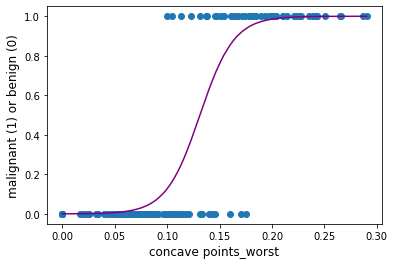

In [21]:
vis_df = pd.DataFrame(data = {'worst_concave_points': X_test['concave points_worst'],
                     'diagnosis': y_test})
vis_df['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:, 1].values
vis_df = vis_df.sort_values(['logistic_preds'])
plt.scatter(X_test['concave points_worst'], y_test)
plt.plot(vis_df['worst_concave_points'], vis_df['logistic_preds'].values, color='purple')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

KNN

In [22]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']
X.shape

(569, 31)

In [23]:
y.shape

(569,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [29]:
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [31]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [36]:
predictions = knn_pipe.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [37]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.951048951048951

Random Forests

In [39]:
y = df['diagnosis']
X = df.drop(columns = 'diagnosis')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
rf = RandomForestRegressor(random_state = 42)

In [43]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [44]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
rf.predict(X_test)

array([0.  , 1.  , 0.94, 0.  , 0.  , 1.  , 1.  , 0.81, 0.8 , 0.12, 0.05,
       1.  , 0.02, 0.91, 0.01, 1.  , 0.02, 0.  , 0.  , 1.  , 0.18, 0.  ,
       1.  , 0.  , 0.01, 0.02, 0.  , 0.12, 0.  , 1.  , 0.  , 0.  , 0.26,
       0.01, 0.  , 0.  , 0.78, 0.  , 1.  , 0.05, 0.  , 1.  , 0.  , 0.  ,
       0.31, 0.  , 0.19, 0.06, 0.  , 0.  , 0.99, 1.  , 0.15, 0.08, 0.  ,
       0.03, 0.  , 1.  , 0.92, 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.02,
       1.  , 0.99, 0.  , 0.04, 0.95, 1.  , 0.  , 1.  , 0.  , 0.03, 0.02,
       0.38, 0.  , 0.09, 0.98, 0.  , 0.12, 1.  , 0.81, 1.  , 0.96, 1.  ,
       0.05, 0.01, 0.  , 0.32, 0.26, 0.06, 0.  , 0.  , 1.  , 1.  , 0.  ,
       1.  , 0.97, 0.  , 0.94, 1.  , 0.  , 0.  , 0.  , 1.  , 0.73, 0.12,
       1.  , 0.  , 0.31, 1.  , 0.34, 1.  , 0.  , 0.08, 0.05, 1.  , 0.44,
       0.  , 0.  , 1.  , 0.04, 1.  , 1.  , 0.  , 0.  , 1.  , 0.82, 1.  ,
       0.12, 0.05, 0.31, 0.86, 0.61, 0.  , 0.4 , 0.94, 0.  , 1.  , 0.  ])

In [46]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9777744379368978
0.8589935497295047


In [54]:
rf_9 = RandomForestRegressor(max_depth = 8, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

0.9777744379368978
0.8589935497295047


In [53]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

8

In [62]:
depths = range(3, max(est_depths))
scoreing = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scoreing.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scoreing.loc[depth, 'Test Score'] = model.score(X_test, y_test)


In [63]:
scoreing.head()

,Test Score,Train Score
3,0.863917,0.932281
4,0.864017,0.956340
5,0.858772,0.968719
6,0.854936,0.976148
7,0.85923,0.979390


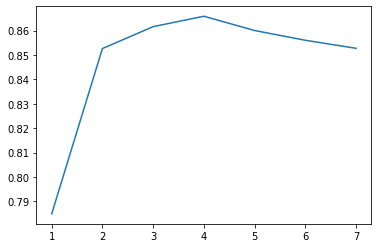

In [64]:
plt.plot(scores['Test Score'])

In [65]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
4,0.865864,0.954992
3,0.861604,0.935181
5,0.860024,0.970481
6,0.856028,0.975255
7,0.852731,0.978698


1)Which hyperparameters did you tune for each of the models? range and depth

2)Which model would you put into production to diagnose malignant tumors? the KNN 

3)How does consideration of the meaning of false positive and false negative errors affect how you determine what 'best' means in this case? it means the difference of having cancer and not. which holds a lot of weight